In [26]:
%matplotlib inline

In [27]:
import random
import numpy as np
import networkx as nx
import pandas as pd
from scipy import sparse as sp
from scipy.sparse.linalg import eigs

from graph_generator.community_graph import make
from helpers import (
    draw_nodes, draw_edges, get_borderless_fig, signed_normalized_laplacian, flatten, pos_adj, neg_adj,
    num_pos_edges, num_neg_edges, get_v1
)
from core import sweep_on_x, sweep_on_x_fast


In [28]:
random.seed(12345)
np.random.seed(12345)

In [29]:
g, groundtruth = make(4, 2, 1, 0, 0.3, 1)
g.add_edge(8, 0, sign=1)
g.add_edge(9, 0, sign=-1)
g.add_edge(10, 4, sign=-1)
g.add_edge(11, 5, sign=1)

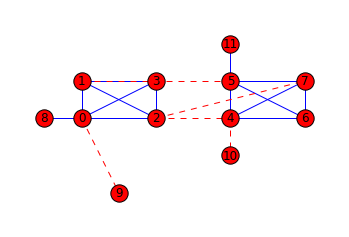

In [30]:
pos = {
    0: [0, 0], 1: [0, 1], 2: [1, 0], 3: [1, 1],
    4: [2, 0], 5: [2, 1], 6: [3, 0], 7: [3, 1],
    8: [-0.5, 0], 9: [0.5, -2], 10: [2, -1], 11: [2, 2]
}
def show_graph():
    fig, ax = get_borderless_fig()
    draw_nodes(g, pos=pos, ax=ax)
    draw_edges(g, pos=pos, ax=ax)

show_graph()

In [41]:
print(exp_sbr_list)
print(list(act_sbr_list[::-1]))


[0.0, 0.02702702702702703, 0.05555555555555555, 0.08571428571428572, 0.11764705882352941, 0.22580645161290322, 0.35714285714285715, 0.5, 0.7, 0.8666666666666667, 1.0, 1.0]
[0.0, 0.02702702702702703, 0.05555555555555555, 0.08571428571428572, 0.11764705882352941, 0.22580645161290322, 0.35714285714285715, 0.5, 0.7, 0.8666666666666667, 1.0, 1.0]


In [44]:
print([0.0, 0.0, 0.05555555555555555, 0.08571428571428572, 0.11764705882352941, 0.22580645161290322, 0.35714285714285715, 0.5, 0.7, 0.7333333333333333, 0.8, 1.0])
print([0.0, 0.02702702702702703, 0.05555555555555555, 0.08571428571428572, 0.11764705882352941, 0.22580645161290322, 0.35714285714285715, 0.5, 0.7, 0.7333333333333333, 0.8, 1.0])

[0.0, 0.0, 0.05555555555555555, 0.08571428571428572, 0.11764705882352941, 0.22580645161290322, 0.35714285714285715, 0.5, 0.7, 0.7333333333333333, 0.8, 1.0]
[0.0, 0.02702702702702703, 0.05555555555555555, 0.08571428571428572, 0.11764705882352941, 0.22580645161290322, 0.35714285714285715, 0.5, 0.7, 0.7333333333333333, 0.8, 1.0]


In [56]:
x = get_v1(g)
exp_c1, exp_c2, exp_C, exp_best_t, exp_best_sbr, exp_ts, exp_sbr_list = sweep_on_x(g, x, verbose=1)
print()
act_c1, act_c2, act_C, act_best_t, act_best_sbr, act_ts, act_sbr_list = sweep_on_x_fast(g, x, verbose=1)

exp_c1, exp_c2, exp_C = set(exp_c1), set(exp_c2), set(exp_C)
act_c1, act_c2, act_C = set(act_c1), set(act_c2), set(act_C)

print('x', x)
print(exp_sbr_list)
print(list(act_sbr_list[::-1]))

assert exp_c1 == act_c2
assert exp_c2 == act_c1
assert exp_C == act_C
assert exp_best_t == act_best_t
assert exp_best_sbr == act_best_sbr
assert (exp_ts == act_ts[::-1]).all()
assert (exp_sbr_list == act_sbr_list[::-1]).all()



100%|██████████| 12/12 [00:00<00:00, 144.38it/s]

best_t: 0.16222142113076207
comm1: [ 0  1  2  3  8 10]
comm2: [ 4  5  6  7  9 11]

pos_order [ 5  4  7  6  9 11 10  8  3  2  1  0]
neg_order [ 0  2  1  3  8 10 11  9  7  6  5  4]
abs_order [ 0  2  5  4  1  7  3  6  9  8 10 11]
pos_vol_by_abs [ 4.  7. 11. 14. 17. 20. 23. 26. 26. 27. 27. 28.]
neg_vol_by_abs [ 1.  3.  4.  6.  7.  8.  8.  8.  9.  9. 10. 10.]
vol_by_abs [ 5. 10. 15. 20. 24. 28. 31. 34. 35. 36. 37. 38.]
pos_cut_by_abs [ 4.  5.  9. 10.  9.  8.  5.  2.  2.  1.  1.  0.]
neg_cut_by_abs [1. 3. 4. 4. 3. 2. 2. 2. 1. 1. 0. 0.]
neg_inside_1 [ 0.  0.  0.  0.  0.  0.  2.  2.  2.  6.  8. 10.]
neg_inside_2 [ 0.  0.  0.  0.  0.  0.  0.  2.  4.  4.  6. 10.]
pos_inside_1 [ 0.  2.  6. 12. 12. 14. 14. 14. 14. 16. 20. 28.]
pos_inside_2 [ 0.  2.  6. 12. 14. 14. 14. 14. 14. 16. 22. 28.]
pos_cut_1 [4. 5. 4. 1. 1. 0. 0. 1. 4. 5. 4. 0.]
pos_cut_2 [4. 5. 4. 1. 0. 0. 1. 1. 4. 5. 3. 0.]
pos_between_1_2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
neg_inside_1_2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x [-0.362

# more test cases

In [57]:
g1 = nx.Graph()
nodes = range(5)
g1.add_nodes_from(nodes)
edges = [(0, 1, 1), (1, 2, 1), (0, 2, -1), (0, 3, 1), (2, 3, -1), (3, 4, 1)]
for u, v, s in edges:
    g1.add_edge(u, v, sign=s)


In [58]:
x1 = get_v1(g1)
exp_c1, exp_c2, exp_C, exp_best_t, exp_best_sbr, exp_ts, exp_sbr_list = sweep_on_x(g1, x1)
act_c1, act_c2, act_C, act_best_t, act_best_sbr, act_ts, act_sbr_list = sweep_on_x_fast(g1, x1)

exp_c1, exp_c2, exp_C = set(exp_c1), set(exp_c2), set(exp_C)
act_c1, act_c2, act_C = set(act_c1), set(act_c2), set(act_C)

assert exp_c1 == act_c2
assert exp_c2 == act_c1
assert exp_C == act_C
assert exp_best_t == act_best_t
assert exp_best_sbr == act_best_sbr
assert (exp_ts == act_ts[::-1]).all()
assert (exp_sbr_list == act_sbr_list[::-1]).all()

# speed benchmark

In [67]:
from tqdm import tqdm

In [73]:
from data_helpers import make_polarized_graphs_fewer_parameters
g_list = [make_polarized_graphs_fewer_parameters(20, 0, 10, 0.05)[0] for i in tqdm(range(10))]
x_list = [get_v1(g) for g in g_list]

In [74]:
g_list[0].number_of_nodes()

400

In [81]:
%timeit -n1 -r1 [sweep_on_x_fast(g, x) for g, x in zip(g_list, x_list)]

300 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [76]:
%timeit -n1 -r1 [sweep_on_x(g, x) for g, x in tqdm(zip(g_list, x_list))]

10it [01:17,  7.71s/it]

1min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [82]:
print('speed up raito:', 77 * 1000 / 300)

speed up raito: 256.6666666666667
